# Coördinated Spiking Model ($\textit{N}$ neurons)

Install required packages:

In [1]:
import numpy as np
import pylab as pl

Network size:

In [2]:
N = 2

Initialize parameters:

In [3]:
# timesteps
dt = 0.01
iterations = 800
xtime = np.arange(0, iterations) * dt

# neural input
x = 10
xder = 0
c = x + xder

# read-out over time
xhat = np.ones(iterations) * 0
x_t = np.ones(iterations) * c

# voltage/error over time
V = np.zeros((N, iterations))
dVdt = np.zeros((N, iterations))
voltages = np.zeros((N, iterations))

# spikes over time
spike = np.zeros((N, iterations))
o = np.zeros((N, iterations))

# read-out weight
gamma = 4

# threshold
T = gamma**2 / 2

Run simulation:

In [4]:
for t in range(1, iterations):
    
    # update read-out
    dxhatdt = - xhat[t - 1] + gamma * np.sum(o[:, t - 1])
    
    xhat[t] = xhat[t - 1] + dt * dxhatdt
    
    # compute error
    V[:, t] = gamma * (x_t[t] - xhat[t])
    
    dVdt = -voltages[:, t - 1] + gamma * x_t[t - 1] - o[:, t - 1] * (gamma ** 2)
    voltages[:, t] =  voltages[:, t - 1] + dt * dVdt
    
    above_threshold = np.where(V[:, t] > T)
    
    # reset neuron when threshold is exceeded
    if len(above_threshold[0]) > 0:
        
        # select random neuron who's voltage is above threshold
        spike_neuron = np.random.randint(0, len(above_threshold[0]))
        
        # update spikes
        o[spike_neuron][t] = 1/dt
        spike[spike_neuron][t] = 1
        
        # reset voltage
        voltages[:, t] = -T
        

Plot results:

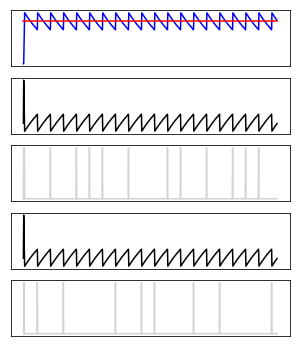

In [6]:
plots = (2 * N) + 1
pl.subplots(plots, 1, figsize=(5,6))

# enable LaTeX
pl.rc('text', usetex=True)

# plot input and read-out
pl.subplot(plots, 1, 1)
pl.plot(xhat, color='blue', label=r'$\hat{x}$')
pl.plot(x_t, color='red', label=r'$x$')
pl.yticks([])
pl.xticks([])
# pl.legend()

counter = 2

for i in range(N):
    
    ylabel = r'$V_{0}$'.format(str(i + 1))
    
    # plot voltage
    pl.subplot(plots, 1, counter)
    pl.plot(V[i], color='black')
    # pl.ylabel(ylabel)
    pl.yticks([])
    pl.xticks([])
    
    counter = counter + 1

    # plot spikes
    pl.subplot(plots, 1, counter)
    pl.plot(spike[i], color='lightgrey')
    pl.yticks([])
    pl.xticks([])
    
    counter = counter + 1

# pl.xlabel('time')